In [1]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
df = read_file('national_combined/NATIONAL_FACILITY_FILE.CSV')
pd.options.display.max_rows = 999

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,4,7,10,11,12,13,14,15,16,17,18,19,21,24,25,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [80]:
pd.options.display.max_columns = 999
df.head(5)

,FRS_FACILITY_DETAIL_REPORT_URL,REGISTRY_ID,PRIMARY_NAME,LOCATION_ADDRESS,SUPPLEMENTAL_LOCATION,CITY_NAME,COUNTY_NAME,FIPS_CODE,STATE_CODE,STATE_NAME,COUNTRY_NAME,POSTAL_CODE,FEDERAL_FACILITY_CODE,FEDERAL_AGENCY_NAME,TRIBAL_LAND_CODE,TRIBAL_LAND_NAME,CONGRESSIONAL_DIST_NUM,CENSUS_BLOCK_CODE,HUC_CODE,EPA_REGION_CODE,SITE_TYPE_NAME,LOCATION_DESCRIPTION,CREATE_DATE,UPDATE_DATE,US_MEXICO_BORDER_IND,LATITUDE83,LONGITUDE83,CONVEYOR,COLLECT_DESC,ACCURACY_VALUE,REF_POINT_DESC,HDATUM_DESC,SOURCE_DESC
0,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN
1,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491744,INLET PERTROLEUM ANCHORAGE,459 W BLUFF DR,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,00,020200004001027,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,28-OCT-2016 15:30:37,NaN,61.231236,-149.888143,EPA_SLT,INTERPOLATION-PHOTO,3,FACILITY CENTROID,NAD83,NaN
2,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491762,UNIVAR USA,590 E 100TH AVE,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99515,NaN,NaN,NaN,NaN,00,020200027121036,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,25-MAY-2016 12:31:49,NaN,61.129407,-149.871824,EPA_SLT,INTERPOLATION-PHOTO,3,FACILITY CENTROID,NAD83,NaN
3,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491780,ASIG FAIRBANKS AIRPORT,5500 AIRPORT INDUSTRIAL RD,NaN,FAIRBANKS,FAIRBANKS NORTH STAR,02090,AK,ALASKA,UNITED STATES,99709,NaN,NaN,NaN,NaN,00,020900010001029,19040506,10,STATIONARY,NaN,01-MAR-2000 00:00:00,29-FEB-2016 17:55:56,NaN,64.811292,-147.884914,EPA_SLT,INTERPOLATION-PHOTO,3,FACILITY CENTROID,NAD83,NaN
4,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491824,TESORO ALASKA KETCHIKAN TERMINAL,1010 STEDMAN ST,NaN,KETCHIKAN,KETCHIKAN GATEWAY,02130,AK,ALASKA,UNITED STATES,99901,NaN,NaN,Yes,NaN,00,021300003003012,19010102,10,STATIONARY,NaN,01-MAR-2000 00:00:00,01-MAR-2016 11:07:03,NaN,55.33501,-131.62795,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN


In [19]:
df.iloc[0].FRS_FACILITY_DETAIL_REPORT_URL


'http://ofmpub.epa.gov/enviro/fii_query_detail.disp_program_facility?p_registry_id=110000491735'

In [19]:
df[df.SITE_TYPE_NAME == 'WATER SYSTEM'].PRIMARY_NAME

1003                                   WATER SERVICES
3167                      MOUNTAIN POINT SERVICE AREA
3168                                           KASAAN
3169                              ANGOON PUBLIC WATER
3170                                       HOONAH PWS
3171                                           SAXMAN
3172                          MT. BETHER BIBLE CENTER
3173                               ALASKAN VILLAGE TC
3184                        SHOUP STREET SERVICE AREA
3219                                PELICAN UTILITIES
3220                               PORT ALEXANDER PWS
3243                               WILDERNESS ESTATES
3244                              SUNRIDGE APARTMENTS
3245                         WASILLA WEST SUBDIVISION
3246                             SETTLERS BAY VILLAGE
3247                                      KOHRING S/D
3248                          SWISS CASTLE WATERWORKS
3249                             JANSSEN FUNERAL HOME
3250                    SCOT

In [24]:
df_supp = read_file('data/national_combined/NATIONAL_SUPP_INTEREST_FILE.CSV')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,2,9,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
df_sic = read_file('national_combined/NATIONAL_SIC_FILE.CSV')

In [24]:
df_sic.head(2)

,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,INTEREST_TYPE,SIC_CODE,PRIMARY_INDICATOR,CODE_DESCRIPTION
0,110000491735,ICIS,2336,ENFORCEMENT/COMPLIANCE ACTIVITY,5172,PRIMARY,"PETROLEUM AND PETROLEUM PRODUCTS WHOLESALERS, ..."
1,110000491735,AIR,AK0000000202000032,AIR MAJOR,5171,PRIMARY,PETROLEUM BULK STATIONS AND TERMINALS


In [21]:
df_org =read_file('national_combined/NATIONAL_ORGANIZATION_FILE.CSV')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,6,9,10,12,13,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [42]:
df_org.head()

,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,INTEREST_TYPE,AFFILIATION_TYPE,START_DATE,END_DATE,ORG_NAME,ORG_TYPE,DUNS_NUMBER,DIVISION_NAME,PHONE_NUMBER,ALTERNATE_PHONE,FAX_NUMBER,EMAIL_ADDRESS,EIN,STATE_BUSINESS_ID,MAILING_ADDRESS,SUPPLEMENTAL_ADDRESS,CITY_NAME,STATE_CODE,STATE_NAME,POSTAL_CODE,COUNTRY_NAME
0,110000491735,RCRAINFO,AKD000641852,UNSPECIFIED UNIVERSE,OWNER,03-JAN-1959 00:00:00,NaN,ALASKA RAILROAD,STATE,NaN,NaN,9072652325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110000491735,ICIS,2600029861,ENFORCEMENT/COMPLIANCE ACTIVITY,FACILITY SITE CONTACT,21-SEP-2011 00:00:00,NaN,FLINT HILLS RESOURCES ALASKA LLC - PORT OF ANC...,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110000491735,OTAQREG,03721,GASOLINE AND DIESEL PRODUCERS,OWNER,NaN,NaN,FLINT HILLS RESOURCES LP,UNKNOWN,NaN,NaN,3168285500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110000491735,RCRAINFO,AKD980987499,SQG,OWNER,20-JUN-2016 00:00:00,NaN,"TESORO LOGISTICS OPERATIONS, LLC",UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110000491735,RCRAINFO,AKD980987499,SQG,OWNER,01-JAN-1959 00:00:00,NaN,ALASKA RAILROAD,STATE,NaN,NaN,9072652325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_facility_sic = df.merge(df_sic, how='inner', on='REGISTRY_ID')
df_facility_org = df.merge(df_org, how='inner', on='REGISTRY_ID')

In [56]:
df_facility_org.head()

,FRS_FACILITY_DETAIL_REPORT_URL,REGISTRY_ID,PRIMARY_NAME,LOCATION_ADDRESS,SUPPLEMENTAL_LOCATION,CITY_NAME_x,COUNTY_NAME,FIPS_CODE,STATE_CODE_x,STATE_NAME_x,COUNTRY_NAME_x,POSTAL_CODE_x,FEDERAL_FACILITY_CODE,FEDERAL_AGENCY_NAME,TRIBAL_LAND_CODE,TRIBAL_LAND_NAME,CONGRESSIONAL_DIST_NUM,CENSUS_BLOCK_CODE,HUC_CODE,EPA_REGION_CODE,SITE_TYPE_NAME,LOCATION_DESCRIPTION,CREATE_DATE,UPDATE_DATE,US_MEXICO_BORDER_IND,LATITUDE83,LONGITUDE83,CONVEYOR,COLLECT_DESC,ACCURACY_VALUE,REF_POINT_DESC,HDATUM_DESC,SOURCE_DESC,PGM_SYS_ACRNM,PGM_SYS_ID,INTEREST_TYPE,AFFILIATION_TYPE,START_DATE,END_DATE,ORG_NAME,ORG_TYPE,DUNS_NUMBER,DIVISION_NAME,PHONE_NUMBER,ALTERNATE_PHONE,FAX_NUMBER,EMAIL_ADDRESS,EIN,STATE_BUSINESS_ID,MAILING_ADDRESS,SUPPLEMENTAL_ADDRESS,CITY_NAME_y,STATE_CODE_y,STATE_NAME_y,POSTAL_CODE_y,COUNTRY_NAME_y
0,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN,RCRAINFO,AKD000641852,UNSPECIFIED UNIVERSE,OWNER,03-JAN-1959 00:00:00,NaN,ALASKA RAILROAD,STATE,NaN,NaN,9072652325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN,ICIS,2600029861,ENFORCEMENT/COMPLIANCE ACTIVITY,FACILITY SITE CONTACT,21-SEP-2011 00:00:00,NaN,FLINT HILLS RESOURCES ALASKA LLC - PORT OF ANC...,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN,OTAQREG,03721,GASOLINE AND DIESEL PRODUCERS,OWNER,NaN,NaN,FLINT HILLS RESOURCES LP,UNKNOWN,NaN,NaN,3168285500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN,RCRAINFO,AKD980987499,SQG,OWNER,20-JUN-2016 00:00:00,NaN,"TESORO LOGISTICS OPERATIONS, LLC",UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://ofmpub.epa.gov/enviro/fii_query_detail....,110000491735,TESORO OCEAN DOCK PETROLEUM TERMINAL,1076 OCEAN DOCK RD,NaN,ANCHORAGE,ANCHORAGE,02020,AK,ALASKA,UNITED STATES,99501,NaN,NaN,NaN,NaN,NaN,020200005001007,19020401,10,STATIONARY,NaN,01-MAR-2000 00:00:00,14-NOV-2016 19:17:57,NaN,61.23011,-149.8909,FRS-TRIS,ADDRESS MATCHING-HOUSE NUMBER,30,CENTER OF A FACILITY OR STATION,NAD83,NaN,RCRAINFO,AKD980987499,SQG,OWNER,01-JAN-1959 00:00:00,NaN,ALASKA RAILROAD,STATE,NaN,NaN,9072652325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
pd.options.display.max_columns = 999
df_facility_org[df_facility_org.SITE_TYPE_NAME == 'WATER SYSTEM'].PGM_SYS_ACRNM.value_counts()#[df_facility_org.PGM_SYS_ACRNM == 'RCRAINFO']

OR-DEQ           102
NJ-NJEMS          59
IDNR_EFD          48
WI-ESR            41
NPDES             31
CA-ENVIROVIEW     11
AZURITE           11
RCRAINFO           5
SIMS               5
EIS                4
PA-EFACTS          4
MO-DNR             3
NH-DES             2
MA-EPICS           2
NDEQ               2
OH-CORE            1
MT-CEDARS          1
EIA-860            1
Name: PGM_SYS_ACRNM, dtype: int64

In [65]:
df_facility_sic[df_facility_sic.SITE_TYPE_NAME == 'WATER SYSTEM'].PGM_SYS_ACRNM.value_counts()

ICIS         40
NPDES         9
NC-FITS       7
OR-DEQ        6
NDEQ          3
AIR           2
AIRS/AFS      2
MT-CEDARS     1
Name: PGM_SYS_ACRNM, dtype: int64

In [4]:
#open('u.item', encoding = "ISO-8859-1")
df_no_viol = read_file('data/No_Violations_ILM.csv')

In [48]:
df_no_viol.head(5)

,Pwsid,PwsName,CityServed,StateCode,PwsTypeCode,PrimarySourceCode,PopulationServedCount,QtrsInVio,Ifea,Feas,Viopaccr,Vioremain,SeriousViolator,DFR URL
0,010106001,Mashantucket Pequot Water System,NaN,CT,CWS,GU,39552,0,NaN,NaN,0,0,No,NaN
1,010109005,Mohegan Tribal Utility Authority,NaN,CT,CWS,SWP,37860,0,1.0,NaN,0,0,No,NaN
2,040000002,POARCH CREEK UTILITIES - WEST,NaN,AL,CWS,GW,750,0,NaN,NaN,0,0,No,NaN
3,043700056,CHEROKEE - ROUGH BRANCH WATER SYSTEM,NaN,NC,CWS,GW,192,0,NaN,NaN,0,0,No,NaN
4,043740008,GOOSE CREEK RETIREMENT PARK,NaN,NC,TNCWS,GW,54,0,NaN,NaN,0,0,No,NaN


In [6]:
df_viol = read_file('data/Violations.csv')

In [50]:
df_viol.head()

,Pwsid,PwsName,CityServed,StateCode,PwsTypeCode,PrimarySourceCode,PopulationServedCount,QtrsInVio,Ifea,Feas,Viopaccr,Vioremain,SeriousViolator,DFR URL
0,010307001,Aquinnah Wampanoag,NaN,MA,CWS,GW,84,12,10.0,NaN,14,7,No,NaN
1,010502002,Narragansett Indian Admin Building,NaN,RI,NTNCWS,GW,30,12,8.0,NaN,7,0,No,NaN
2,010502003,Narragansett Four Winds Community Center,NaN,RI,NTNCWS,GW,30,10,9.0,NaN,7,0,No,NaN
3,020000001,JIMMERSONTOWN WS,NaN,NY,CWS,GW,296,12,NaN,NaN,1,1,No,NaN
4,020000004,STEAMBURG WS,NaN,NY,CWS,GW,288,12,NaN,NaN,2,2,No,NaN


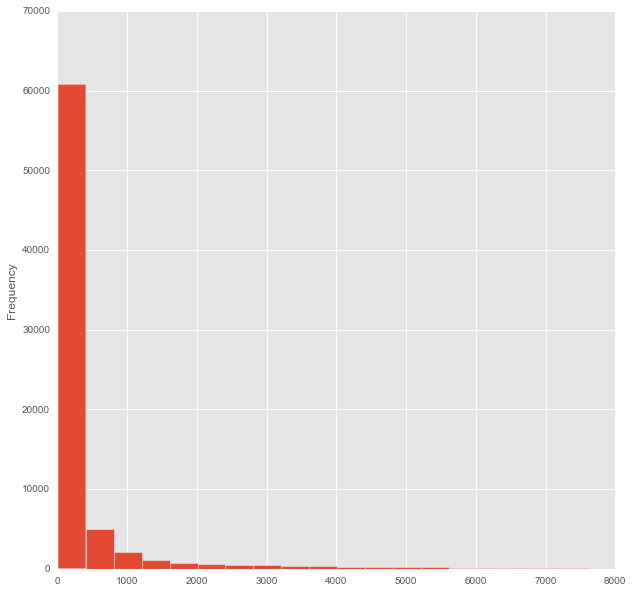

In [5]:
df_no_viol.PopulationServedCount.plot(kind = 'hist',figsize = (10,10),bins = range(10,8000,400))

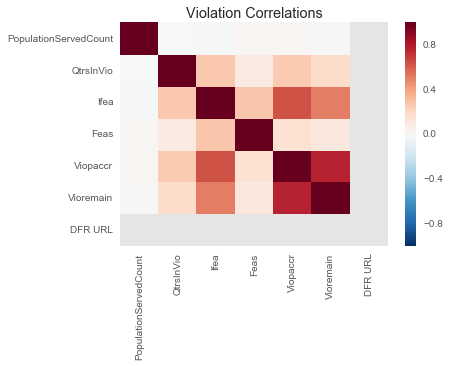

In [90]:
plot_correlations(df_viol,'Violation Correlations')

In [77]:
ndpes_ps_violations = read_file('npdes_downloads/NPDES_PS_VIOLATIONS.csv')

In [78]:
ndpes_ps_violations.head(5)

,NPDES_ID,NPDES_VIOLATION_ID,PERM_SCHEDULE_EVENT_ID,VIOLATION_TYPE_CODE,VIOLATION_CODE,VIOLATION_DESC,SCHEDULE_EVENT_CODE,SCHEDULE_EVENT_DESC,SCHEDULE_DATE,RNC_DETECTION_CODE,RNC_DETECTION_DESC,RNC_DETECTION_DATE,RNC_RESOLUTION_CODE,RNC_RESOLUTION_DESC,RNC_RESOLUTION_DATE
0,NH0100447,20031000,20023009,P,C40,Schedule Event unachieved and not reported,02999,Toxics Report,01/15/2003,N,Non-Receipt of DMR/Schedule Report,02/14/2003,2,RE - Back into Compliance,05/13/2003
1,NH0100781,20031788,20023890,P,C20,Schedule Event achieved late but reported,CS011,"Plan, Report, or Scope of Work",02/19/2003,NaN,NaN,NaN,NaN,NaN,NaN
2,NM0028835,20033184,20024572,P,C20,Schedule Event achieved late but reported,95499,Biosolids Management Plan,02/19/2001,NaN,NaN,NaN,NaN,NaN,NaN
3,PR0000698,20034224,20028130,P,C30,Schedule Event unachieved but reported,55099,Quality Assurance Report,03/28/1988,N,Non-Receipt of DMR/Schedule Report,04/27/1988,9,RE - Manual by Back into Compliance/Administra...,04/27/1988
4,PR0000591,20034234,20025741,P,C20,Schedule Event achieved late but reported,55099,Quality Assurance Report,03/14/1983,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
ndpes_cs_violations = read_file('npdes_downloads/NPDES_CS_VIOLATIONS.csv')

In [80]:
ndpes_se_violations = read_file('npdes_downloads/NPDES_SE_VIOLATIONS.csv')

In [81]:
ndpes_cs_violations.head(5)

,NPDES_ID,NPDES_VIOLATION_ID,VIOLATION_TYPE_CODE,COMP_SCHEDULE_EVENT_ID,COMP_SCHEDULE_NMBR,VIOLATION_CODE,VIOLATION_DESC,SCHEDULE_EVENT_CODE,SCHEDULE_EVENT_DESC,SCHEDULE_DATE,ACTUAL_DATE,RNC_DETECTION_CODE,RNC_DETECTION_DESC,RNC_DETECTION_DATE,RNC_RESOLUTION_CODE,RNC_RESOLUTION_DESC,RNC_RESOLUTION_DATE
0,MOR109CO3,2602692935,C,1400003598,1,C10,Schedule Event reported late,CS001,Pay Required Civil Penalty Amount,05/04/2009,05/14/2009,NaN,NaN,NaN,NaN,NaN,NaN
1,MO0099473,2600021150,C,37671,1,C40,Schedule Event unachieved and not reported,CS031,Achieve Final Compliance With All Obligations ...,06/30/2007,NaN,S,Schedule Violation,09/29/2007,1,NC - Unresolved RNC,09/29/2007
2,KS0086690,3400375259,C,37483,2,C30,Schedule Event unachieved but reported,CS010,Status/Progress Report,07/07/2006,04/12/2007,N,Non-Receipt of DMR/Schedule Report,08/07/2006,5,RE - Resolved RP by NPDES Closure of Enf. Acti...,04/17/2007
3,KS0086690,3400375262,C,37484,2,C30,Schedule Event unachieved but reported,CS010,Status/Progress Report,10/07/2006,04/17/2007,N,Non-Receipt of DMR/Schedule Report,11/07/2006,5,RE - Resolved RP by NPDES Closure of Enf. Acti...,04/17/2007
4,KS0086690,3400375265,C,37485,2,C30,Schedule Event unachieved but reported,CS010,Status/Progress Report,01/07/2007,04/17/2007,N,Non-Receipt of DMR/Schedule Report,02/07/2007,5,RE - Resolved RP by NPDES Closure of Enf. Acti...,04/17/2007


In [82]:
ndpes_se_violations.head(5)

,NPDES_ID,NPDES_VIOLATION_ID,VIOLATION_TYPE_CODE,VIOLATION_CODE,VIOLATION_DESC,SINGLE_EVENT_VIOLATION_DATE,SINGLE_EVENT_END_DATE,SINGLE_EVENT_VIOLATION_COMMENT,SINGLE_EVENT_AGENCY_TYPE_CODE,RNC_DETECTION_CODE,RNC_DETECTION_DESC,RNC_DETECTION_DATE,RNC_RESOLUTION_CODE,RNC_RESOLUTION_DESC,RNC_RESOLUTION_DATE
0,HI0020753,3404318520,S,D0017,Permit Violations - Violation Specified in Com...,03/27/2009,03/27/2009,NaN,ST6,NaN,NaN,NaN,NaN,NaN,NaN
1,AKG570013,3001048193,S,B0020,Management Practice Violations - Improper Oper...,07/03/2012,07/03/2012,NaN,ST6,NaN,NaN,NaN,NaN,NaN,NaN
2,AKG570013,2200051843,S,D0017,Permit Violations - Violation Specified in Com...,06/17/2010,06/17/2010,IMPLEMENT USE OF QAPP\r\nREPLACE WARNING SIGN ...,ST6,NaN,NaN,NaN,NaN,NaN,NaN
3,AKG570013,2200051842,S,B0041,Management Practice Violations - Failure to Ma...,06/17/2010,06/17/2010,NaN,ST6,NaN,NaN,NaN,NaN,NaN,NaN
4,AKG570015,3000679646,S,B0020,Management Practice Violations - Improper Oper...,05/17/2012,05/17/2012,NaN,ST6,NaN,NaN,NaN,NaN,NaN,NaN


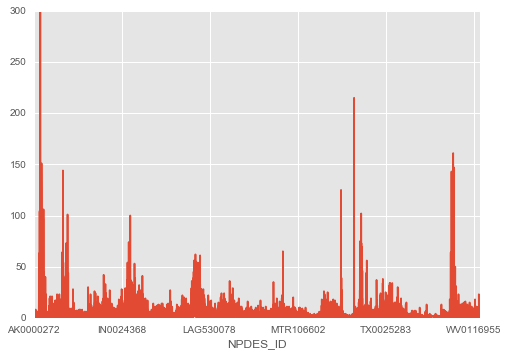

In [92]:
ndpes_se_violations.groupby('NPDES_ID').size().plot()

In [ ]:
fig = plt.figure(figsize=(20,20))
#plt.xticks(listing, listing, rotation=80)
ax = fig.add_subplot(1,1,1)
#ax.xticks(listing,None,rotation='vertical')
#ax.set_ylabel('Average Price per Listing', fontsize=20)
#ax.set_xlabel('Listing_Id', fontsize=12)
count = 0
for index, i in enumerate(df_facility_npdes_cs.groupby(['NPDES_ID','FACILITY_NAME']).size().to_frame().iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    if count <= 1:
        count+=1
        continue
        
    ax.plot(i[0], i[1], marker='o', linestyle='', ms=12)
    count+=1

In [101]:
npdes = read_file('npdes_downloads/ICIS_FACILITIES.csv')
df_facility_npdes_se = ndpes_se_violations.merge(npdes, how='inner', on='NPDES_ID')
df_facility_npdes_cs = ndpes_cs_violations.merge(npdes, how='inner', on='NPDES_ID')

In [104]:
df_facility_npdes_cs.head(2)

,NPDES_ID,NPDES_VIOLATION_ID,VIOLATION_TYPE_CODE,COMP_SCHEDULE_EVENT_ID,COMP_SCHEDULE_NMBR,VIOLATION_CODE,VIOLATION_DESC,SCHEDULE_EVENT_CODE,SCHEDULE_EVENT_DESC,SCHEDULE_DATE,ACTUAL_DATE,RNC_DETECTION_CODE,RNC_DETECTION_DESC,RNC_DETECTION_DATE,RNC_RESOLUTION_CODE,RNC_RESOLUTION_DESC,RNC_RESOLUTION_DATE,ICIS_FACILITY_INTEREST_ID,FACILITY_UIN,FACILITY_TYPE_CODE,FACILITY_NAME,LOCATION_ADDRESS,SUPPLEMENTAL_ADDRESS_TEXT,CITY,COUNTY_CODE,STATE_CODE,ZIP,GEOCODE_LATITUDE,GEOCODE_LONGITUDE,IMPAIRED_WATERS
0,MOR109CO3,2602692935,C,1400003598,1,C10,Schedule Event reported late,CS001,Pay Required Civil Penalty Amount,05/04/2009,05/14/2009,NaN,NaN,NaN,NaN,NaN,NaN,1400020404,1.100375e+11,POF,FRONTLINE DEVELOPMENT PRO,PRAIRIE DUNES DR,NaN,BRANSON,MO213,MO,65616,36.676528,-93.223472,NaN
1,MOR109CO3,2602692936,C,1400003598,1,C20,Schedule Event achieved late but reported,CS001,Pay Required Civil Penalty Amount,05/04/2009,05/14/2009,NaN,NaN,NaN,NaN,NaN,NaN,1400020404,1.100375e+11,POF,FRONTLINE DEVELOPMENT PRO,PRAIRIE DUNES DR,NaN,BRANSON,MO213,MO,65616,36.676528,-93.223472,NaN


In [209]:
df_facility_npdes_cs[df_facility_npdes_cs.NPDES_ID.value_counts().to_frame() > 100].groupby(['NPDES_ID','FACILITY_NAME']).size().to_frame().plot(rot=90)

TypeError: Empty 'DataFrame': no numeric data to plot

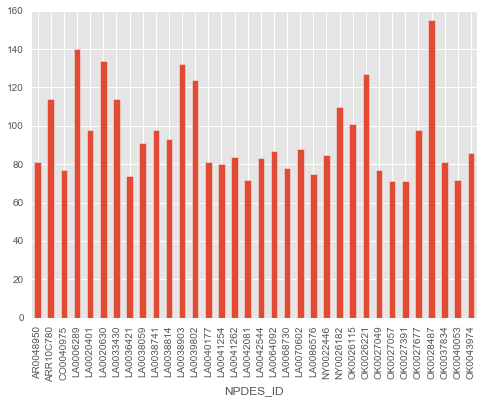

In [221]:
df_facility_npdes_cs.groupby('NPDES_ID').count()[df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID > 70].NPDES_VIOLATION_ID.plot(kind='bar')

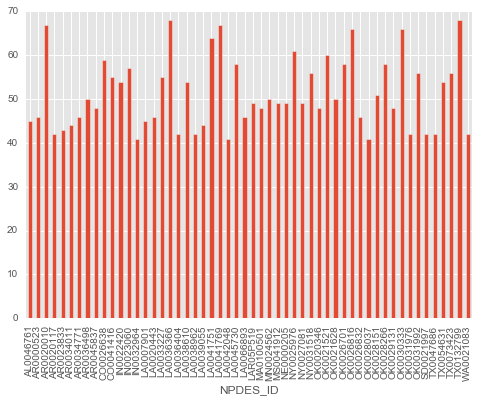

In [230]:
less_than_70 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID <= 70
greater_than_40 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID > 40
df_facility_npdes_cs.groupby('NPDES_ID').count()[less_than_70 & greater_than_40].NPDES_VIOLATION_ID.plot(kind='bar')

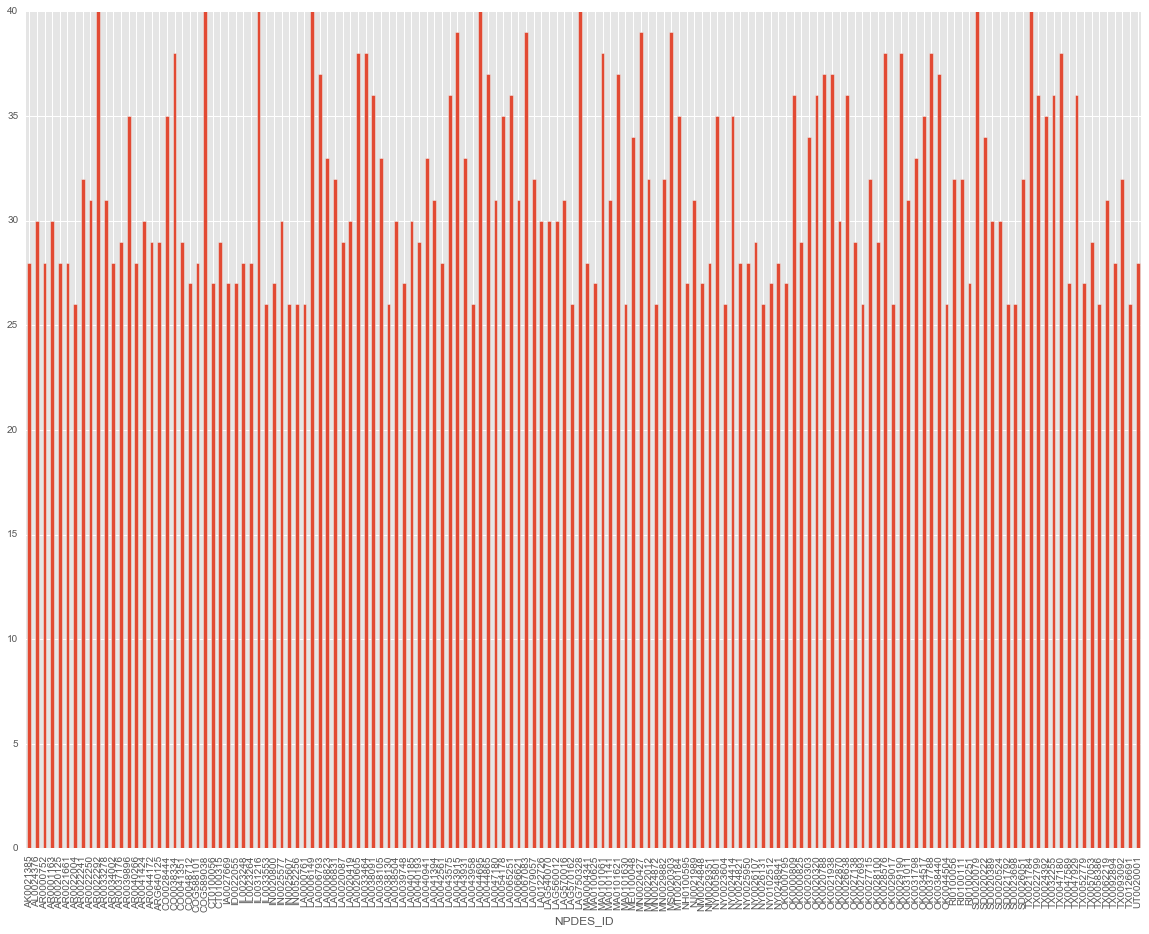

In [233]:
less_than_40 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID <= 40
greater_than_25 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID > 25
df_facility_npdes_cs.groupby('NPDES_ID').count()[less_than_40 & greater_than_20].NPDES_VIOLATION_ID.plot(kind='bar', figsize = (20,15))

In [237]:
less_than_25 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID <= 25
greater_than_10 = df_facility_npdes_cs.groupby('NPDES_ID').count().NPDES_VIOLATION_ID > 10
df_facility_npdes_cs.groupby('NPDES_ID').count()[less_than_25 & greater_than_10].NPDES_VIOLATION_ID.to_frame()

,NPDES_VIOLATION_ID
NPDES_ID,
AK0000922,19
AK0021245,11
AK0021377,11
AK0021458,15
AK0021890,11
AL0020699,16
AL0020869,19
AL0020885,16
AL0021245,13
